In [1]:
"""Tauc_plot_bandgap_Python,
Author:
Gholamhosain Haidari 
Email address: moh1135@gmail.com
LinkedIn: linkedin.com/in/gholamhosain-haidari
Orcid: https://orcid.org/0000-0003-2400-9280
-----
Tauc Plot Generation: Importing and Preprocessing
    Wavelength-Absorption Data from Excel for Bandgap Analysis"""
# Import required libraries for data manipulation, visualization, curve fitting, and selecting points on a graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.widgets import RectangleSelector

# Load the data from a CSV-Ecxel file and preprocess it as needed
data = pd.read_excel("Raw wavelength_absorption_data.xlsx", usecols=["Wavelength(nm)", "AbsorptionC"])

# Skip the first three rows of the loaded data to remove unnecessary information 
data = data.iloc[3:]
# Display the first five rows of the DataFrame to preview the processed data
print(data.head())


   Wavelength(nm)  AbsorptionC
3      798.991455     0.092731
4      798.016174     0.092323
5      797.005798     0.092476
6      795.994873     0.091779
7      794.983643     0.091488


In [2]:
"""Bandgap Calculation Preparation: Planck Constant, 
   Energy Conversion, and Direct Tauk Plot Data Generation"""
# Define the Planck constant as a constant value for bandgap calculations
planck_constant = 6.626e-34
# Create a new column 'Energy (eV)' by converting wavelength (nm) data to energy (eV)
data['Energy (eV)'] = 1240 / data['Wavelength(nm)']

# Calculate the product of 2.303 and the Energy (eV) and 
# Absorption columns for the horizontal axis (X0) of the Tauc plot
data['Y 0 tauk plot'] = 2.303 * (data['Energy (eV)'] * data['AbsorptionC'])

# Calculate the square of the 'X 0 tauk plot' column for 
# the vertical axis (Y direct) of the Tauc plot to estimate the direct bandgap energy
data['Y Di tauk plot'] = (data['Y 0 tauk plot'] ** 2)

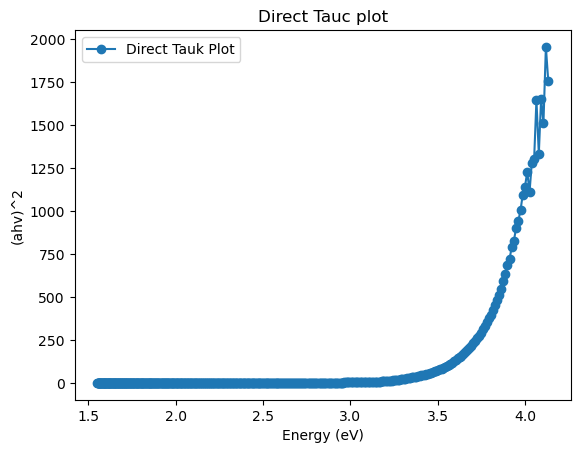

In [3]:
"""Tauc Plot Visualization:
   Generating a Direct Tauc Plot for Bandgap Analysis"""
# Plot the 'Y Di tauk plot' against the 'Energy (eV)' column
plt.plot(data['Energy (eV)'], data['Y Di tauk plot'], '-o', label='Direct Tauk Plot')

# Set the axis labels
plt.xlabel('Energy (eV)')
plt.ylabel('(ahv)^2')

# Set the plot title
plt.title('Direct Tauc plot')

# Display the legend
plt.legend(labels=['Direct Tauk Plot'])

# Show the plot
plt.show()

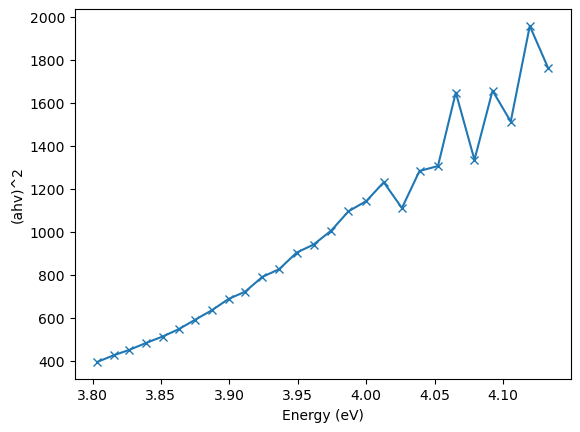

In [4]:
"""Since the horizontal axis takes into account the entire scale, 
   finding the bandgap does not seem easy. With this overview, 
   a threshold can be considered for reploting the shape.
   This helps us to take a closer look at the part of the curve 
   that is suitable for finding the energy Bandgap. 
   We can repeat this part over and over again 
   by choosing different threshold values. """

# Choose a threshold energy value (hν_threshold) to subset the data
hν_threshold = 3.8 # Example value - Adjust based on your data

above_threshold_data = data[(data['Energy (eV)'] > hν_threshold)]
# Plot the subsetted data above the threshold energy
plt.plot(above_threshold_data['Energy (eV)'], above_threshold_data['Y Di tauk plot'], '-x', label='Subsetted Data')

# Set the axis labels
plt.xlabel('Energy (eV)')
plt.ylabel('(ahv)^2')

# Show the plot
plt.show()

In [5]:
"""We can separate the ones larger than the threshold and 
fit them with a straight line. Definitely, 
the  intersects of this line with the x-axis can give us 
proper information about the bandgap."""
from scipy.optimize import curve_fit

# Extract the x and y values from the above_threshold_data DataFrame
x_vals = np.array(above_threshold_data['Energy (eV)'])
y_vals = np.array(above_threshold_data['Y Di tauk plot'])

# Fit a linear regression line to the subsetted data using the curve_fit function
popt, pcov = curve_fit(lambda x, m, b: m*x + b, x_vals, y_vals)

# Extract the slope and intercept values from the linear fit results
slope = popt[0]
intercept = popt[1]

# Calculate the x-intercept of the linear regression line or E_g
x_intercept = -intercept / slope
E_g=x_intercept


# Print the calculated bandgap energy value with a precision of 3 decimal places
print(f"Bandgap energy: {E_g:.3f} eV")

Bandgap energy: 3.735 eV


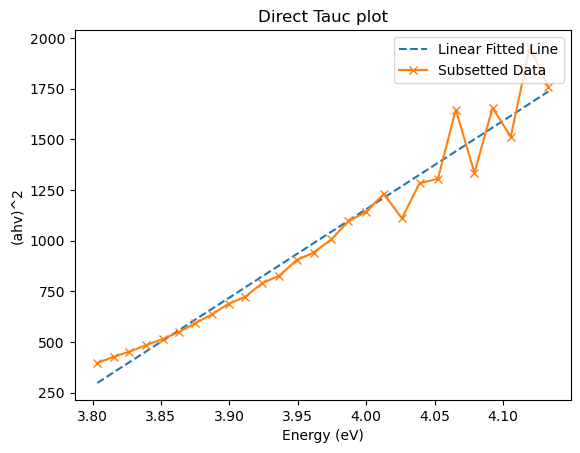

In [6]:
# %% ======================================================================
# %% Plotting the linear fitted line and subsetted data points
# %% ======================================================================
# Add the fitted line to the plot
plt.plot(above_threshold_data['Energy (eV)'], slope * above_threshold_data['Energy (eV)'] + intercept, '--', label='Linear Fitted Line')

# Add the subsetted data points to the plot
plt.plot(above_threshold_data['Energy (eV)'], above_threshold_data['Y Di tauk plot'], '-x', label='Subsetted Data')

# Set the axis labels
plt.xlabel('Energy (eV)')
plt.ylabel('(ahv)^2')

# Set the plot title
plt.title('Direct Tauc plot')

# Display the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()